# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns
from scipy.spatial.distance import cdist

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()
df.describe()
df.drop('Unnamed: 32', axis=1, inplace= True)
columns= ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

(569, 33)


In [84]:
#seperated features and labels
features= df.loc[0:, columns].values 
labels= df.loc[0:,'diagnosis'].values
#created instance of standard scalar
scaler = StandardScaler()
#fitted_features into scalar model
scaler.fit(features)
#standarized the features
standard_data= scaler.transform(features)

standard_data.shape

(569, 30)

In [85]:
#Creating a pca instance with 10 components
pca= PCA(10)
#fitting standardized data into pca model
pca.fit(standard_data)
#transforming standard data into principle components
pca_data=pca.transform(standard_data)
#print pca values
print(pca.explained_variance_)
#took component 1 and 2 to use on model
component_1= pca_data.T[0]
component_2= pca_data.T[1]
component_3= pca_data.T[2]


[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087]


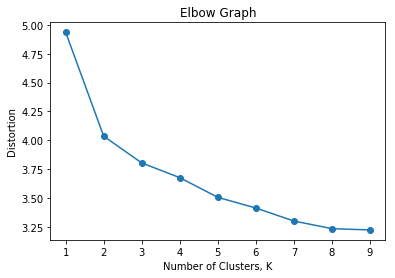

In [86]:
#empty list that will hold distortions
distortions = []
#setting K to equal numbers in the range of 1-10 exclusive
K = range(1,10)
#iterating through each amount of clusters and finding the average distances between points and centroids
for k in K:
    #creating a model for each iteration of K
    kmeanModel = KMeans(n_clusters=k).fit(standard_data)
    #fitting standardized data into model
    kmeanModel.fit(standard_data)
    #appending the mean of the sums of datapoints to their centroids for that model
    distortions.append(sum(np.min(cdist(standard_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])

#plotting number of clusters used to the average distance of datapoints to clusters
plt.plot(K, distortions, 'o-')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Distortion')
plt.title('Elbow Graph')
plt.show()

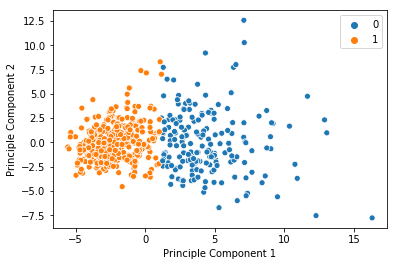

In [87]:
#created a k means model with 2 clusters, top of elbow
kmeans = KMeans(n_clusters=2)
#fitted standard data into model
kmeans.fit(standard_data)
#grabbed the cluster labels from the model
k_labels = kmeans.labels_
#plotted component 1 and component 2 with their hue as the cluster they belong to
sns.scatterplot(x=component_1, y=component_2, hue= k_labels)
#K means clustering with 2 clusters
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2');

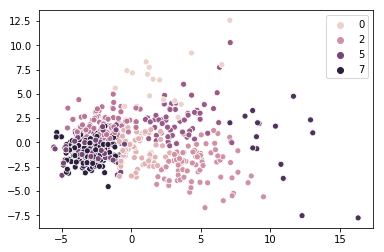

In [88]:
#created a k means model with 8 clusters, bottom of elbow
kmeans2= KMeans(n_clusters=8)
#fitted standard data into model
kmeans2.fit(standard_data)
#grabbed cluster labels
k_labels2= kmeans2.labels_
#plot component 1 and 2 
sns.scatterplot(x=component_1, y= component_2, hue= k_labels2)

Text(0, 0.5, 'Prin b vfvc ciple Component 2')

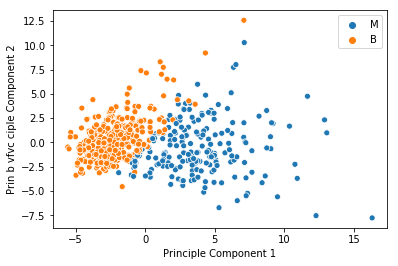

In [90]:
#checking my work
sns.scatterplot(x=component_1, y=component_2, hue= labels);
plt.xlabel('Principle Component 1')
plt.ylabel('Prin b vfvc ciple Component 2')

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

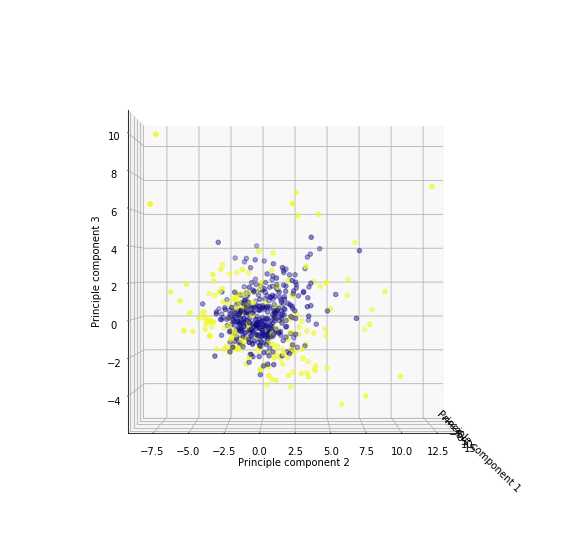

In [63]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(component_1, component_2, component_3, c=k_labels, cmap='plasma');
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
ax.view_init(0, 0)

    

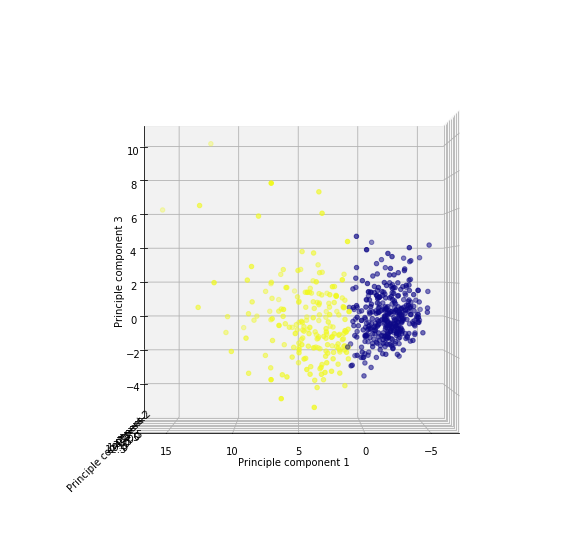

In [66]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(component_1, component_2, component_3, c=k_labels, cmap='plasma');
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
ax.view_init(0, 90)

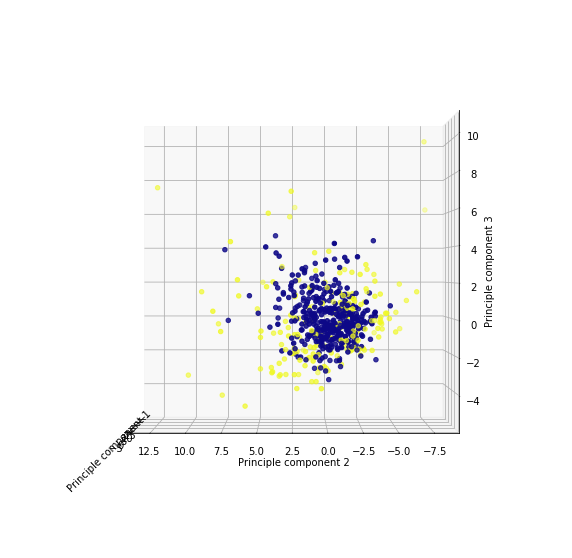

In [67]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(component_1, component_2, component_3, c=k_labels, cmap='plasma');
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
ax.view_init(0, 180)

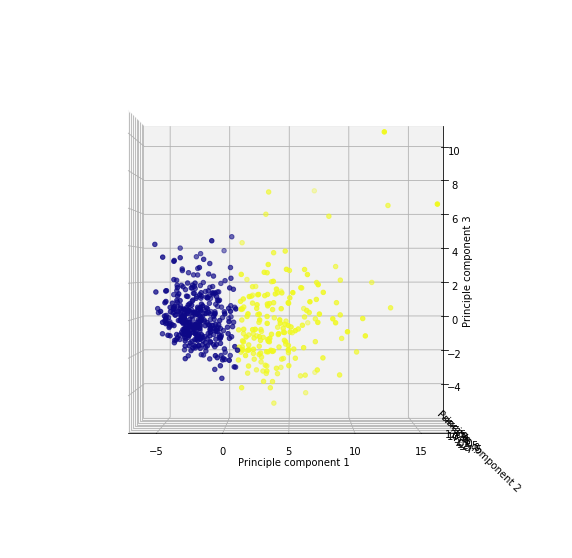

In [68]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(component_1, component_2, component_3, c=k_labels, cmap='plasma');
ax.set_xlabel('Principle component 1')
ax.set_ylabel('Principle component 2')
ax.set_zlabel('Principle component 3')
ax.view_init(0, 270)

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.